In [966]:
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np

class Schelling:
    
    
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races):
        self.width=width
        self.height=height
        self.empty_ratio=empty_ratio
        self.similarity_threshold=similarity_threshold
        self.n_iterations=n_iterations
        self.races=races
        
    def populate(self):
        self.empty_houses=[]
        self.agents={}
        self.a=list(range(1,self.width+1))
        self.b=list(range(1,self.height+1))
        self.all_houses=list(itertools.product(self.a,self.b))                     
        random.shuffle(self.all_houses)
        self.n_empty=round(self.empty_ratio*len(self.all_houses))
        self.remaining_houses=self.all_houses[:len(self.all_houses)-self.n_empty]
        self.empty_houses=self.all_houses[len(self.all_houses)-self.n_empty:]
        self.race_list=list(range(1,self.races+1))
        for i in range(len(self.remaining_houses)):   
            random.shuffle(self.race_list)
            self.chosen_one=self.race_list[0]
            self.agents[self.remaining_houses[i]]=self.chosen_one
        return self.agents
    
    def plot_city(self):
        fig, ax = plt.subplots(figsize=(self.width*0.5, self.height*0.5))
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position('none')
        ax.grid()
        cols = ['r', 'g', 'b', 'c', 'm', 'y', 'k']           
        for key, value in self.agents.items():           
            x = key[0]-0.5
            y = key[1]-0.5
            ax.scatter(x, y, c=cols[value-1], marker='s', s=500)
        
    def is_unsatisfied(self, coordinate_x, coordinate_y):
        self.coordinate_x=coordinate_x
        self.coordinate_y=coordinate_y
        self.x2=self.coordinate_x+1
        self.x1=self.coordinate_x-1
        self.y2=self.coordinate_y+1
        self.y1=self.coordinate_y-1
        self.neighbours=[(self.x1,self.y1),(self.x2,self.y2),(self.x1,self.y2),(self.x2,self.y1),
        (self.coordinate_x,self.y1),(self.coordinate_x,self.y2),(self.x1,self.coordinate_y),(self.x2,self.coordinate_y)]
        self.count=0
        if (self.coordinate_x,self.coordinate_y) not in self.agents.keys():
            return 'Empty'
        for i in self.neighbours:
            if i in self.agents.keys():
                if self.agents[i]==self.agents[(self.coordinate_x,self.coordinate_y)]:
                    self.count+=1
        self.tot_neighbours=0
        for i in self.neighbours:
            if i in self.agents.keys():
                self.tot_neighbours+=1
        if self.tot_neighbours==0:
            return False
        if self.count/self.tot_neighbours < self.similarity_threshold:
            return True
        else:
            return False

    def update(self):
        self.key_list=list(self.agents.keys())
        self.value_list=list(self.agents.values())
        if len(self.empty_houses)==0:
            return self.agents
        for i in range(len(self.agents)):
            self.x=list(self.agents.keys())[i][0]
            self.y=list(self.agents.keys())[i][1]
            if self.is_unsatisfied(self.x,self.y):
                random.shuffle(self.empty_houses)
                self.new_house=self.empty_houses.pop(0)
                self.empty_houses.append(self.key_list[i])
                self.key_list[i]=self.new_house
        self.agents={}
        for key in self.key_list:
            self.agents[key] = self.value_list[0]
            self.value_list.pop(0)
        return self.agents
    
    def sim_single(self, coordinate_x, coordinate_y):
        self.coordinate_x=coordinate_x
        self.coordinate_y=coordinate_y
        self.x2=self.coordinate_x+1
        self.x1=self.coordinate_x-1
        self.y2=self.coordinate_y+1
        self.y1=self.coordinate_y-1
        self.neighbours=[(self.x1,self.y1),(self.x2,self.y2),(self.x1,self.y2),(self.x2,self.y1),
        (self.coordinate_x,self.y1),(self.coordinate_x,self.y2),(self.x1,self.coordinate_y),(self.x2,self.coordinate_y)]
        self.count=0
        for i in self.neighbours:
            if i in self.agents.keys():
                if self.agents[i]==self.agents[(self.coordinate_x,self.coordinate_y)]:
                    self.count+=1
        self.tot_neighbours=0
        for i in self.neighbours:
            if i in self.agents.keys():
                self.tot_neighbours+=1
        if self.tot_neighbours==0:
            return 'zero error'
        return self.count/self.tot_neighbours
        
    def sim_index(self):
        self.ratios=[]
        for i in range(len(self.agents)):
            self.x=list(self.agents.keys())[i][0]
            self.y=list(self.agents.keys())[i][1]
            data_transfer=self.sim_single(self.x,self.y)
            if self.tot_neighbours > 0:
                self.ratios.append(self.sim_single(self.x,self.y))
        if self.ratios==[]:
            return 0
        self.avg_ratio=sum(self.ratios)/len(self.ratios)
        return self.avg_ratio

    def iterate(self):
        self.populate()
        x_values=list(range(1,self.n_iterations+1))
        y_values=[]
        for i in range(self.n_iterations):
            y_values.append(self.sim_index())
            self.update()
        return [x_values, y_values]
    
    def iterate2(self):
        self.populate()
        self.plot_city()
        x_values=list(range(1,self.n_iterations+1))
        y_values=[]
        for i in range(self.n_iterations):
            y_values.append(self.sim_index())
            self.update()
        return [x_values, y_values]
                
    def avg_iterate(self, sample_size):
        self.sample_size=sample_size        
        self.lol=[]
        for i in range(self.sample_size):
            self.lol.append(self.iterate()[1])
        avg=sum(np.array(self.lol))/len(self.lol)
        return [self.iterate()[0],avg]              

## In the following examples, the default arguments will be: 15 by 10 grid, 0.3 empty ratio, 0.55 similarity threshold, 200 iterations, and 4 races

We begin by visualising the grid of individuals before and after the 200 iterations have taken place.

Clearly, it seems that races become grouped together as these iterations elapse. However, in future examples we will see that this is not always the case.

Text(0, 0.5, 'Similarity Index')

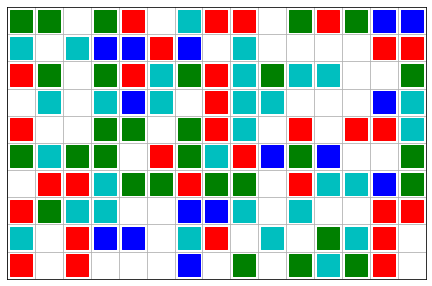

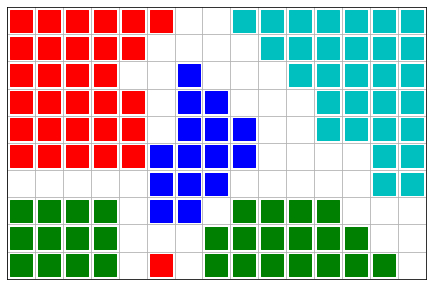

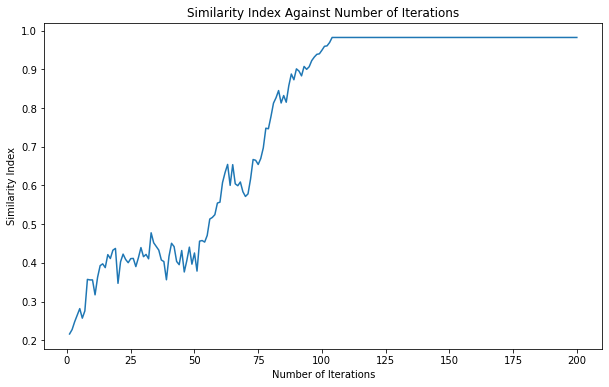

In [1046]:
exp=Schelling(15,10,0.3,0.55,200,4)
vals=exp.iterate2()
exp.plot_city()
fig=plt.figure(figsize=(10,6))
plt.plot(vals[0],vals[1])
plt.title('Similarity Index Against Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')

Next, we look at how similarity index changes over the number of iterations when we average 20 repeats of the 200 iterations. In theory, this should get us closer to the expected values than the previous graph. The overall relationship is very similar however the fluctuations are milder.

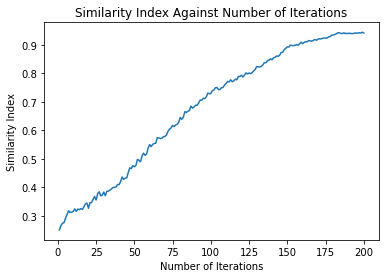

In [1038]:
exp1=Schelling(15,10,0.3,0.55,200,4)
vals2=exp1.avg_iterate(20)
plt.plot(vals2[0],vals2[1])
plt.title('Similarity Index Against Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')
plt.show()

In the following example, we vary the number of races between two and six while keeping all other arguments the same. We see that it takes less time for races to group together when there are fewer races.

This makes intuitive sense: when an unsatisfied individual moves to a random empty square, there is a lower probability that he will move to a square surrounded by neighbours of the same race if there are a greater number of different races.

If there are too many races, we see that it becomes impossible for similarity index to improve over time.

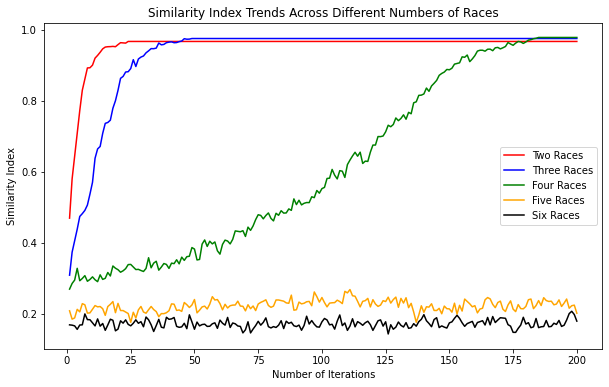

In [1030]:
fig = plt.figure(figsize=(10,6))
a=Schelling(15,10,0.3,0.55,200,2)
v1=a.avg_iterate(5)
plt.plot(v1[0],v1[1],c='red',label='Two Races')
b=Schelling(15,10,0.3,0.55,200,3)
v2=b.avg_iterate(5)
plt.plot(v2[0],v2[1],c='blue',label='Three Races')
c=Schelling(15,10,0.3,0.55,200,4)
v3=c.avg_iterate(5)
plt.plot(v3[0],v3[1],c='green',label='Four Races')
d=Schelling(15,10,0.3,0.55,200,5)
v4=d.avg_iterate(5)
plt.plot(v4[0],v4[1],c='orange',label='Five Races')
e=Schelling(15,10,0.3,0.55,200,6)
v5=e.avg_iterate(5)
plt.plot(v5[0],v5[1],c='black',label='Six Races')
plt.legend(loc='center right')
plt.title('Similarity Index Trends Across Different Numbers of Races')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')
plt.show()

Now we look at what happens when the similarity threshold (i.e. the intolerance of other races) is increased.

Interestingly, the less tolerant people are of other races, the harder it becomes to live near people of the same race.

This could perhaps be explained by the fact that even when similarity index starts to get quite high, nobody is happy with their neighbours. Therefore everyone moves houses and this randomisation will often allocate people less similar neighbours than before.

The other interesting thing to note is that the steady state similarity index is lower for the 35% threshold than the 45% threshold. This is because people are less picky in the 35% case and so will stop moving house before the similarity index tends towards 100%.

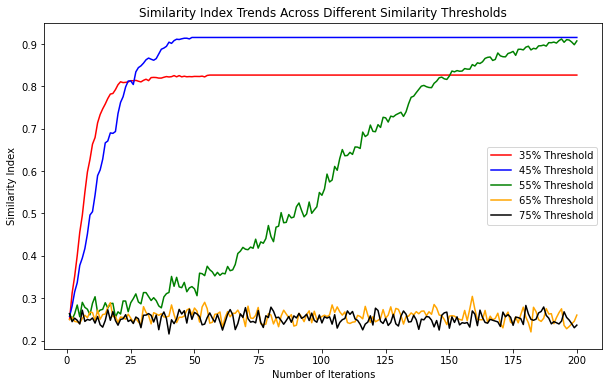

In [1025]:
fig = plt.figure(figsize=(10,6))
a=Schelling(15,10,0.3,0.35,200,4)
v1=a.avg_iterate(5)
plt.plot(v1[0],v1[1],c='red',label='35% Threshold')
b=Schelling(15,10,0.3,0.45,200,4)
v2=b.avg_iterate(5)
plt.plot(v2[0],v2[1],c='blue',label='45% Threshold')
c=Schelling(15,10,0.3,0.55,200,4)
v3=c.avg_iterate(5)
plt.plot(v3[0],v3[1],c='green',label='55% Threshold')
d=Schelling(15,10,0.3,0.65,200,4)
v4=d.avg_iterate(5)
plt.plot(v4[0],v4[1],c='orange',label='65% Threshold')
e=Schelling(15,10,0.3,0.75,200,4)
v5=e.avg_iterate(5)
plt.plot(v5[0],v5[1],c='black',label='75% Threshold')
plt.legend(loc='center right')
plt.title('Similarity Index Trends Across Different Similarity Thresholds')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')
plt.show()

When we vary the percentage of spaces that are empty, we see that when this percentage is higher, the convergence towards perfect similarity is quicker. This makes intuitive sense: when there are only a few empty spaces, it makes it easier for the puzzle to unravel itself - people can move to spacious areas where there is great potential to find neighbours of the same race, rather than having to move to crowded areas where they get in the way of other races.

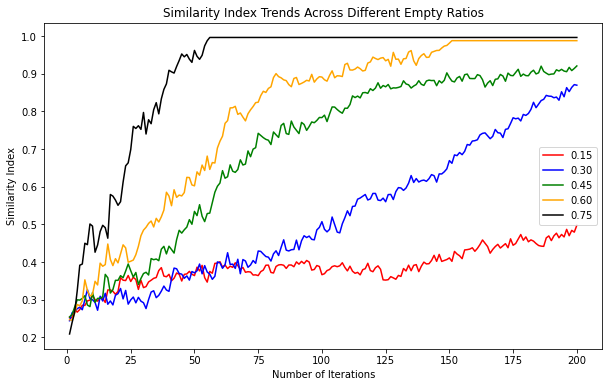

In [1028]:
fig = plt.figure(figsize=(10,6))
a=Schelling(15,10,0.15,0.55,200,4)
v1=a.avg_iterate(5)
plt.plot(v1[0],v1[1],c='red',label='0.15')
b=Schelling(15,10,0.30,0.55,200,4)
v2=b.avg_iterate(5)
plt.plot(v2[0],v2[1],c='blue',label='0.30')
c=Schelling(15,10,0.45,0.55,200,4)
v3=c.avg_iterate(5)
plt.plot(v3[0],v3[1],c='green',label='0.45')
d=Schelling(15,10,0.60,0.55,200,4)
v4=d.avg_iterate(5)
plt.plot(v4[0],v4[1],c='orange',label='0.60')
e=Schelling(15,10,0.75,0.55,200,4)
v5=e.avg_iterate(5)
plt.plot(v5[0],v5[1],c='black',label='0.75')
plt.legend(loc='center right')
plt.title('Similarity Index Trends Across Different Empty Ratios')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')
plt.show()

Finally, we see that when the total area of the grid gets larger, it becomes easier for races to group together.

This makes intuitive sense: if the area of the grid is larger, then this implies a larger number of empty spaces, giving the races more scope to group together.

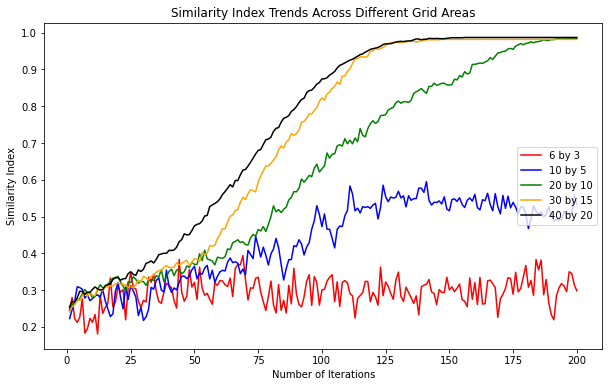

In [1029]:
fig = plt.figure(figsize=(10,6))
a=Schelling(6,3,0.3,0.55,200,4)
v1=a.avg_iterate(5)
plt.plot(v1[0],v1[1],c='red',label='6 by 3')
b=Schelling(10,5,0.3,0.55,200,4)
v2=b.avg_iterate(5)
plt.plot(v2[0],v2[1],c='blue',label='10 by 5')
c=Schelling(20,10,0.3,0.55,200,4)
v3=c.avg_iterate(5)
plt.plot(v3[0],v3[1],c='green',label='20 by 10')
d=Schelling(30,15,0.3,0.55,200,4)
v4=d.avg_iterate(5)
plt.plot(v4[0],v4[1],c='orange',label='30 by 15')
e=Schelling(40,20,0.3,0.55,200,4)
v5=e.avg_iterate(5)
plt.plot(v5[0],v5[1],c='black',label='40 by 20')
plt.legend(loc='center right')
plt.title('Similarity Index Trends Across Different Grid Areas')
plt.xlabel('Number of Iterations')
plt.ylabel('Similarity Index')
plt.show()